In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

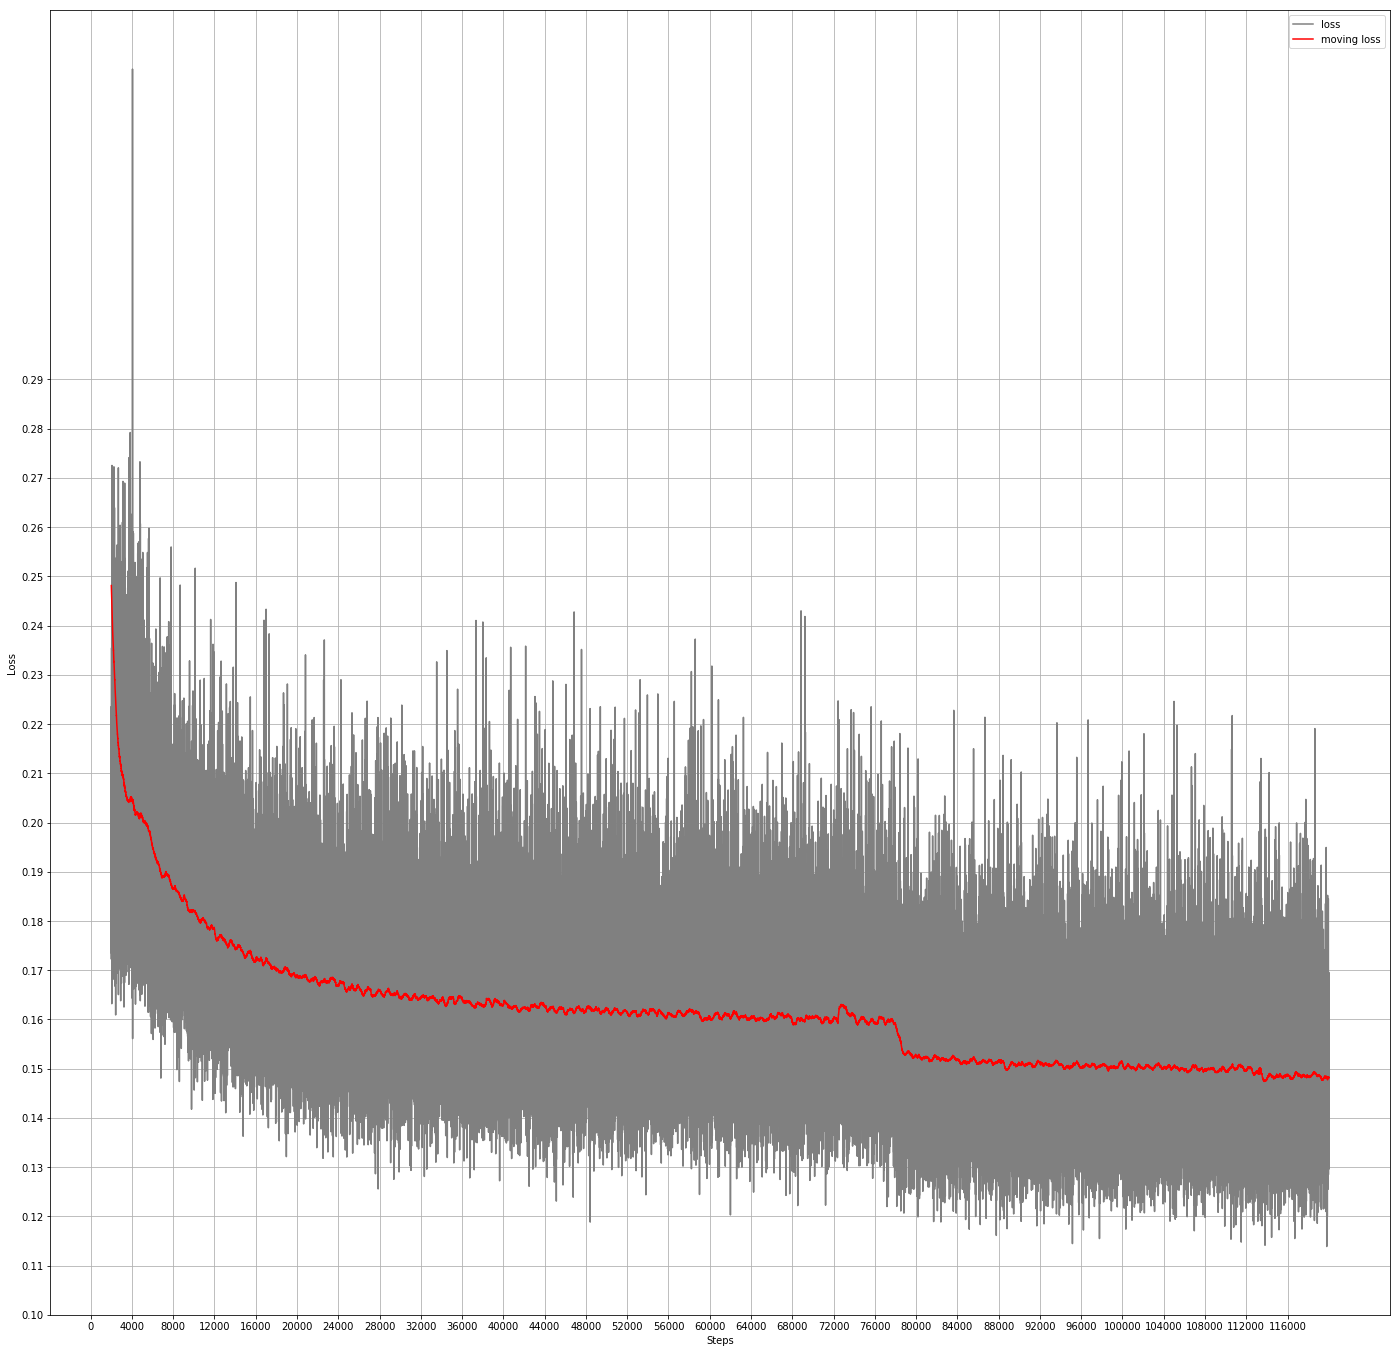

In [51]:
#I0110 15:57:19.413511 140116235937536 basic_session_run_hooks.py:260] loss = 0.031843882, step = 227 (0.538 sec)

import matplotlib.pyplot as plt

import re
import numpy as np
from pathlib import Path

%matplotlib inline

logfile = "__LOSS_LOG_FILE__"

def plot_loss(files):
    step = []
    loss = []
    mov_loss=[]
    mv = 0

    p = re.compile('.*loss = .*')
    p1 = re.compile('.*NaN.*')

    for file in files:
        with open(file) as f:
            lines = f.readlines()
            for line in lines:
                if not p.match(line):
                    continue               
                if p1.match(line):
                    continue
                items = re.split(" +", line)
                if (items[4] != 'loss'):
                    continue
                step.append(int(items[9]))
                loss_value=float(items[6].split(',')[0])
                loss.append(loss_value)

                if mv == 0:
                    mv = loss_value
                else:
                    mv = 0.002*loss_value + 0.998*mov_loss[-1]
                
                mov_loss.append(mv)
           
    p1, = plt.plot(step[2000:], loss[2000:], color='grey',label='loss')
    p2, = plt.plot(step[2000:], mov_loss[2000:], color='red',label='moving loss')
    
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.legend(handles=[p1,p2],labels=['loss','moving loss'],loc='best')
    plt.xticks(np.arange(0, 120000, 4000))
    plt.yticks(np.arange(0.1, 0.3, step=0.01))
    plt.grid(True, which='both')
    #plt.minorticks_on()
    plt.show()
    
fig = plt.figure(figsize=(24,24))
plot_loss([logfile])

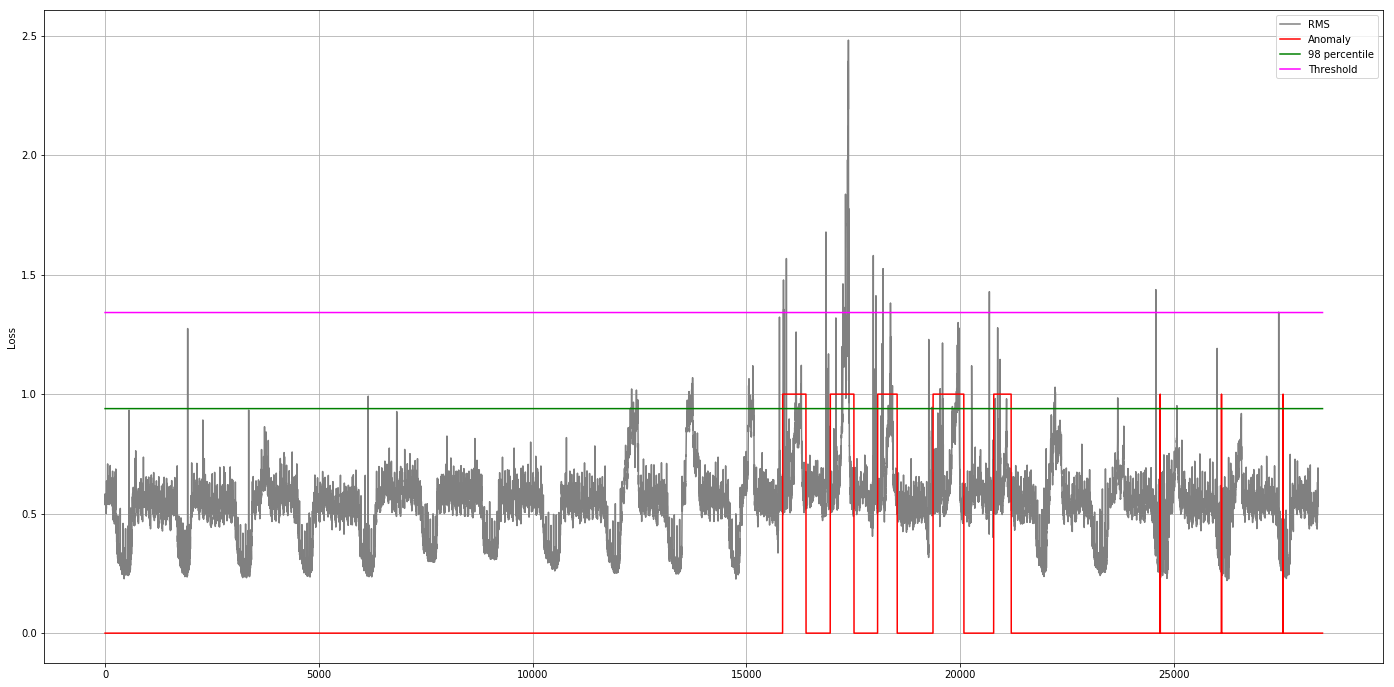

In [3]:
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

RMS = np.genfromtxt('RMS_loss.csv', delimiter=',', skip_header=0, dtype='float')
label = np.genfromtxt('ServerMachineDataset/test_label/machine-1-1.txt', delimiter=',', skip_header=0, dtype='int')

fig = plt.figure(figsize=(24,12))

p1, = plt.plot(RMS, color='grey',label='RMS')
p2, = plt.plot(label, color='red',label='Anomaly')
p3, = plt.plot(np.repeat(0.939440399, label.shape[0]), color='green', label='98 percentile')
p4, = plt.plot(np.repeat(1.3414254, label.shape[0]), color='magenta', label='Threshold')

plt.ylabel("Loss")
plt.legend(handles=[p1,p2,p3,p4],labels=['RMS','Anomaly','98 percentile','Threshold'],loc='best')
plt.grid(True, which='both')
plt.show()